<a href="https://colab.research.google.com/github/KilovoIt/Jupyter-Notebooks/blob/main/Cheatsheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### *'If you cannot replicate it, you don't understand it'*

##### Run this cell if you have any problems with displaying graphs in full height.

In [ ]:
#@title

from IPython.display import Javascript
def resize_colab_cell():
  display(Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'))
get_ipython().events.register('pre_run_cell', resize_colab_cell)

# Correlation coefficient 

<IPython.core.display.Javascript object>

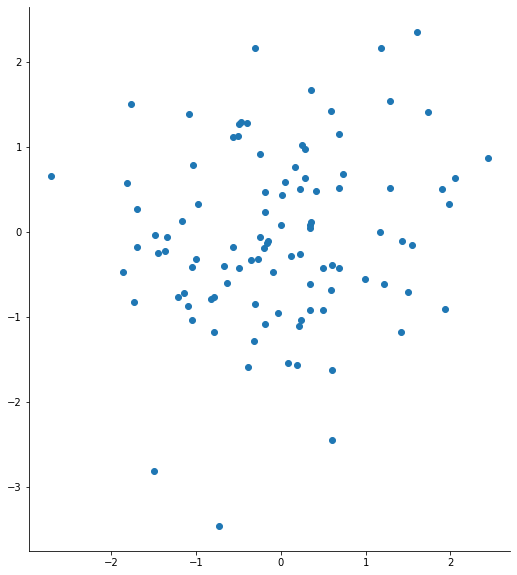

In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd

def draw_scatter():
    rng = np.random.RandomState(15)
    x_corr = rng.randn(100)
    y_corr = rng.randn(100)

    df_corr =  pd.DataFrame()
    df_corr['x'] = x_corr
    df_corr['y'] = y_corr

    fig_corr = plt.figure(figsize=(20, 10))
    ax_corr = plt.subplot(111)
    ax_corr.scatter(x_corr, y_corr)
    ax_corr.spines['top'].set_visible(False)
    ax_corr.spines['right'].set_visible(False)
    ax_corr.set_aspect(1)
    plt.show()


draw_scatter()

# <font color='#00347C'>**Normal Distribution:**</font>

Normal distribution is called "normal" because it is the most frequent distribution of probabilities in nature. The distribution, unlike other simple math functions, has a very distinctive bell-curve shape. So what exactly does it tell us? Well, it is a probability distribution. Each point on the X-axis is bound to some function value which tells how likely is this X-value is to happen. In our example, there are no real data. Digits on the X-axis show how many standard deviations $\sigma$ the point is away from the mean of the population $\mu$.

The area under graph is equal to 1 and it makes sense, why: it's a summary of all probabilities of X totalling 100% for all possible outcomes. Red lines show different parts of the distribution and how much of the total probability it contains. Almost 70% of the data lies within one standard deviation both ways from the mean. 3 standard deviation each way contains 99.7% of the total probability, meaning there is almost nothing left. The mean has the highest probability of 40% to happen.   

<IPython.core.display.Javascript object>

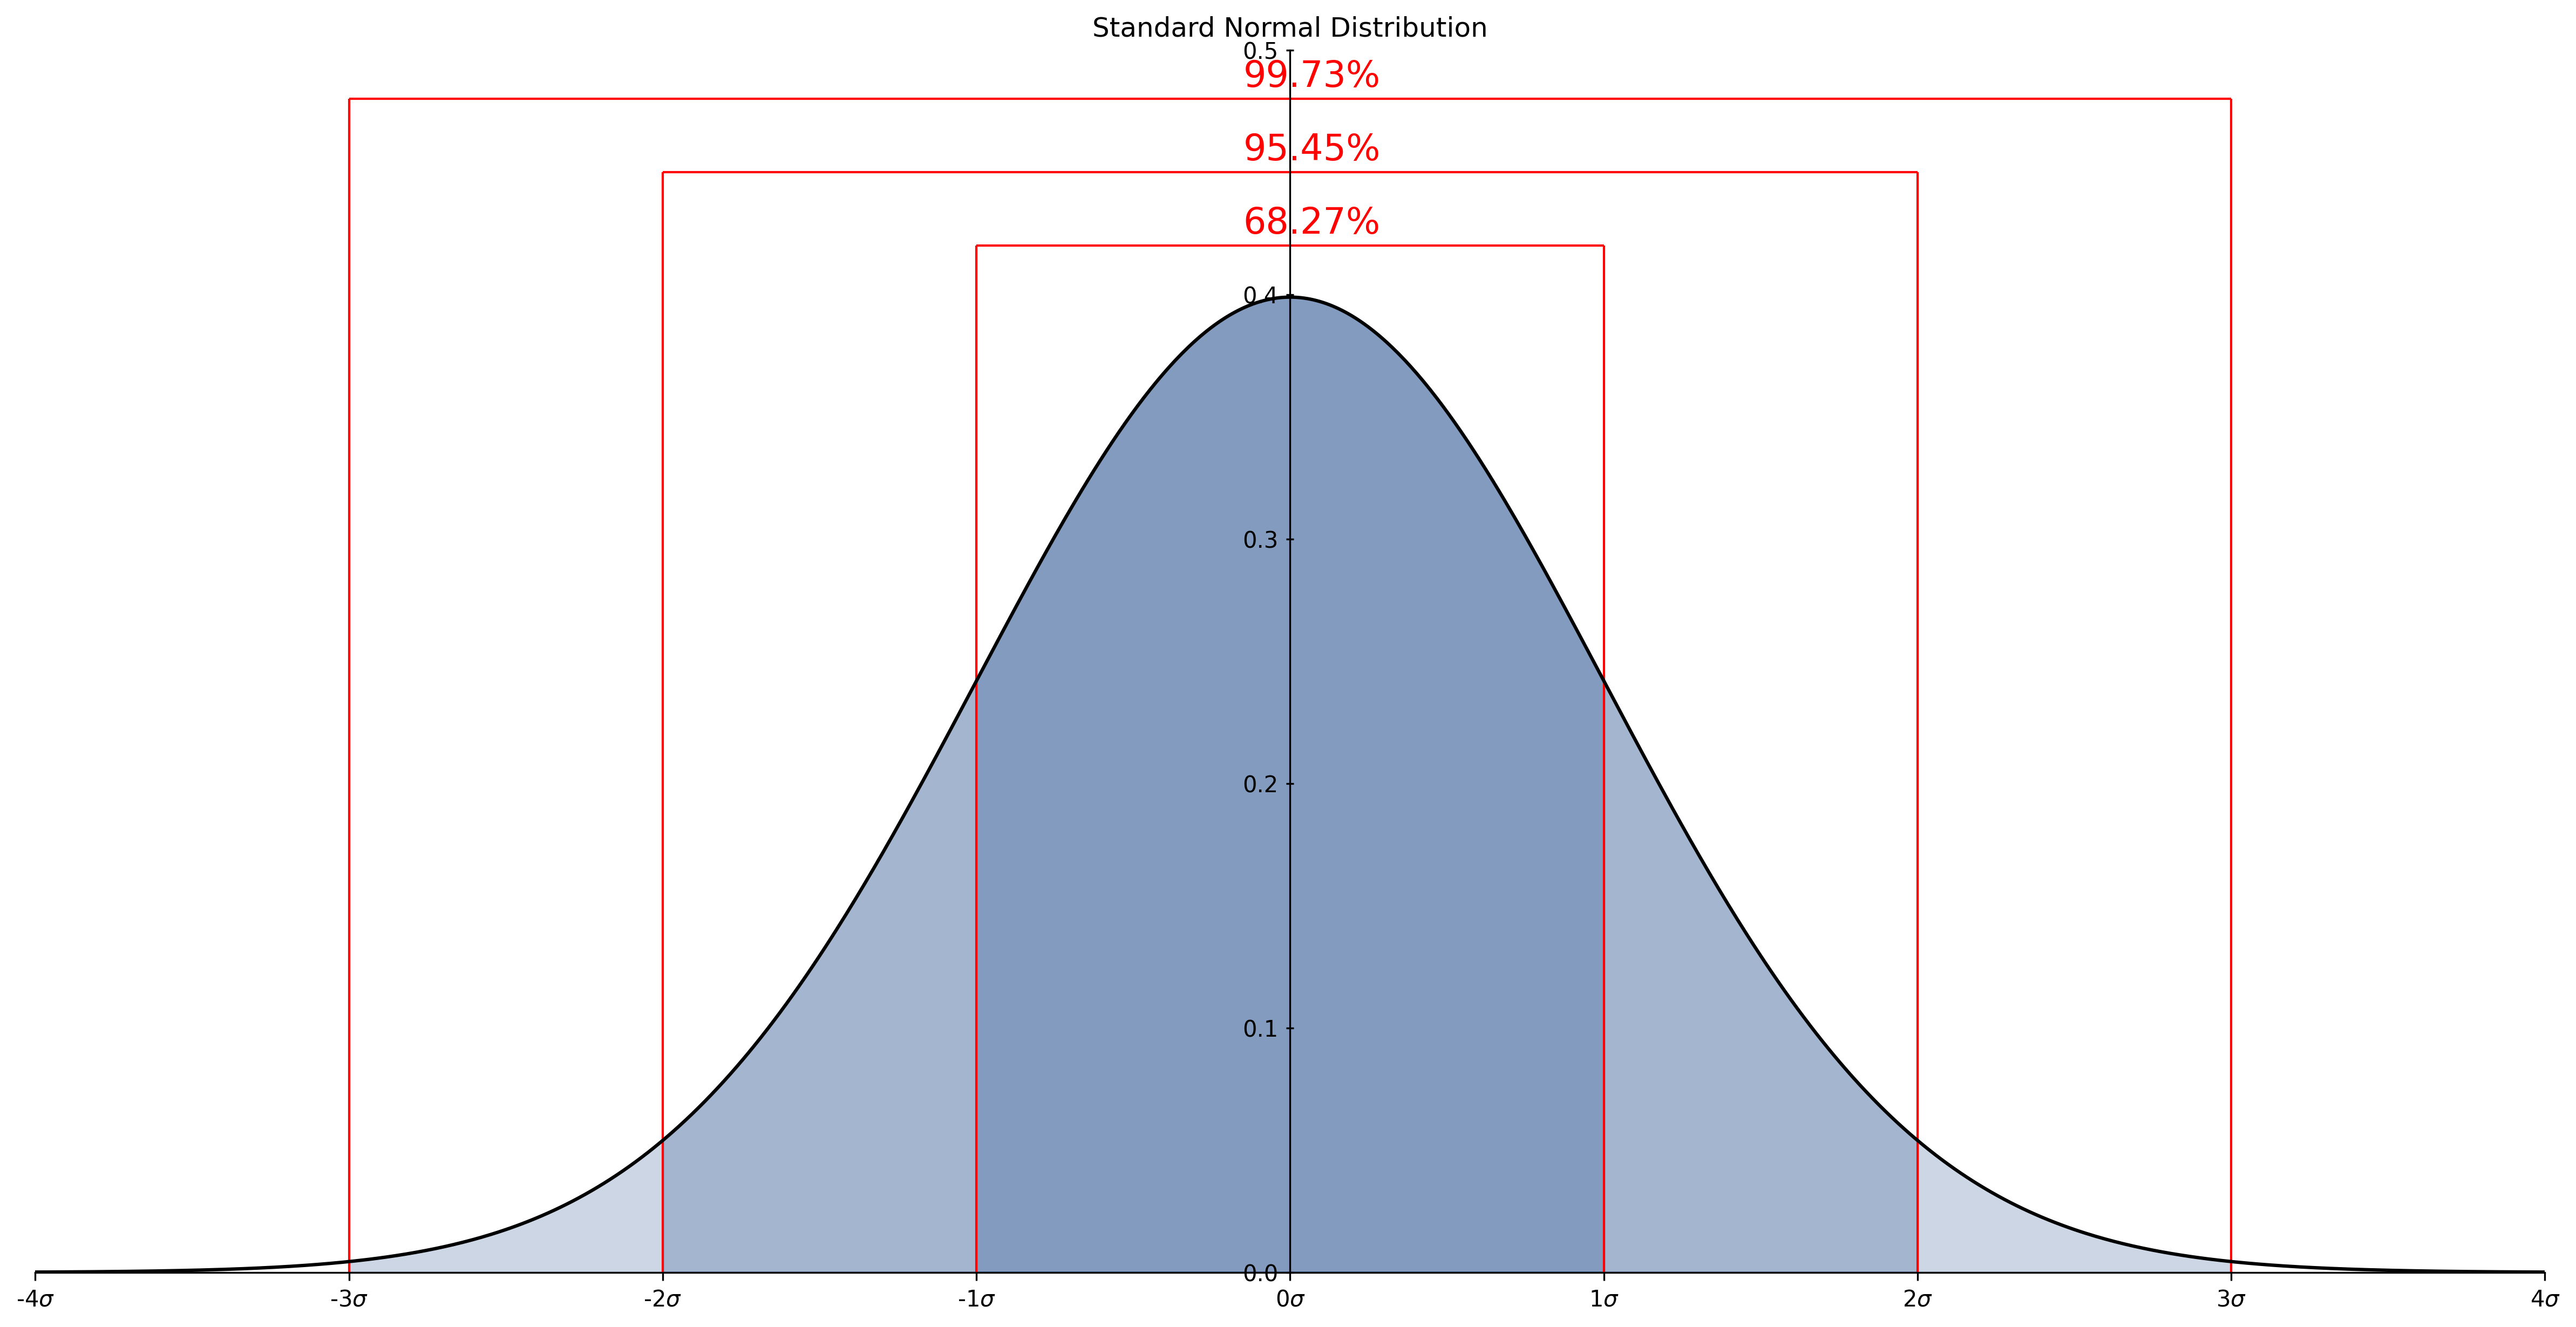

In [ ]:
#@title

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import matplotlib.ticker as ticker

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 1000)

fig = plt.figure(figsize=(20, 10), dpi=300)

ax = plt.subplot(111)
ax.plot(x, stats.norm.pdf(x, mu, sigma), color='Black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position('center')
ax.tick_params(axis = 'y', direction='inout')
formatter = ticker.FormatStrFormatter(r'%1.0f$\sigma$')
ax.xaxis.set_major_formatter(formatter)

ax.set_ylim([0, 0.5])
ax.set_xlim([-4, 4])
#ax.fill_betweenx(stats.norm.pdf(x, mu, sigma), 0, x, color='DarkCyan')
ax.vlines([-1, 1], 0.0, .42, colors='r', lw=1)
ax.hlines(.42, -1, 1, colors='r', lw=1)
ax.fill_between(np.linspace(-1, 1, 1000), 
                stats.norm.pdf(np.linspace(-1, 1, 1000), mu, sigma),
                color='#00347C', alpha=0.2)
ax.text(-.15, 0.425, '68.27%', color='r', fontsize=16)

ax.vlines([-2, 2], 0.0, .45, colors='r', lw=1)
ax.hlines(.45, -2, 2, colors='r', lw=1)
ax.fill_between(np.linspace(-2, 2, 1000), 
                stats.norm.pdf(np.linspace(-2, 2, 1000), mu, sigma), 
                color='#00347C', alpha=0.2)
ax.text(-.15, 0.455, '95.45%', color='r', fontsize=16)

ax.vlines([-3, 3], 0.0, .48, colors='r', lw=1)
ax.hlines(.48, -3, 3, colors='r', lw=1)
ax.text(-.15, 0.485, '99.73%', color='r', fontsize=16)

ax.fill_between(np.linspace(-3, 3, 1000), 
                stats.norm.pdf(np.linspace(-3, 3, 1000), mu, sigma), 
                color='#00347C', alpha=0.2)
ax.set_title('Standard Normal Distribution')

plt.show()




# <font color='DarkGreen'>**Central Limit Theorem:**</font>

### Sufficiently large sample sizes will form approximately normal distribution of the sample means. 

######  <font color='DarkBlue'>*We have some random distribution. We take a simple random sample of **n** from the population, and repeat this procedure x1000. I could probably use a larger number for that, but that would have a detrimental effect on code performance. Will the distribution of the sample means look the same in all of the cases? What are the factors affecting the shape of the distribution?* </font>

In [ ]:

#@title

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets
from IPython.display import display


import random
import seaborn as sns
import math
import scipy.stats as stats
from scipy.stats import expon
import numpy as np
import matplotlib.pyplot as plt

#This function prepares population distribution 
def DISTR(shape):
        
        if shape == 'Bimodal':
            mu = 0
            variance = 1
            sigma = math.sqrt(variance)
            
            x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 10000)
            y =  stats.norm.pdf(x, mu, sigma)

        elif shape == 'Uniform':
            y = []
            for i in range(1000):
                for k in range(50):
                    y.append(i)

        elif shape == 'Exponential':
            y = expon.pdf(np.linspace(expon.ppf(0.01),
                    expon.ppf(0.99), 1000))
            
        elif shape == 'Normal':
            y = np.random.normal(100, 5, 10000)

        return(y)

dist = []
for distribution in ['Normal', 'Bimodal', 'Exponential', 'Uniform']:
    dist.append(DISTR(distribution))


    

def CLT(n=100, dist=dist, shape='Normal'):
    sample_means = []

    if shape == 'Normal':
        y = dist[0]

    elif shape == 'Bimodal':
        y = dist[1]

    elif shape == 'Exponential':
        y = dist[2]

    else:
        y = dist[3]

    for i in range(1000):
        sample_means.append(np.mean(random.sample(list(y), n)))


    fig = plt.figure(figsize=(20, 10), dpi=300)

    ax0 = plt.subplot(121)
    ax0.hist(y, color='PaleGreen', bins=40, edgecolor='black', lw=1.2)
    ax0.set_title('Population distribution')
    ax0.spines['right'].set_visible(False)
    ax0.spines['top'].set_visible(False)

    ax1 = plt.subplot(122)
    ax1.hist(sample_means, edgecolor='black', color='LightSkyBlue', bins=40)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.set_title(f'Distribution of the sample means, sample size of {n}')

    plt.suptitle("Central Limit Theorem")
    plt.show()



samp_size = widgets.IntSlider(min=1, max=100, step=1, continuous_update=False, value=1, description='sample size')
shape_pop = widgets.Dropdown(options=['Bimodal', 'Normal', 'Uniform', 'Exponential'], description='population:')
ui = widgets.HBox([samp_size, shape_pop])


out = widgets.interactive_output(CLT, {'n': samp_size, 'shape': shape_pop})
display(ui, out)


Output()

I took 1000 random samples of **n** from the original population. Where did the distribution of the sample means started looking somewhat bell-shaped? What happened to the standard deviation of that distribution with **n** increasing? Did it become narrower? 

# <font color="#0047ab">**T-test**</font>

In [ ]:
#@title

## Basic T-Distribution
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import pandas as pd

### Describing all the necessary widgets
alpha_level = widgets.FloatSlider(min=0.01, max=0.99, step=0.01, description=u'\u03B1:', continuous_update=False)
n_of_tails = widgets.Dropdown(options=[('one-tailed', 1), ('two-tailed', 2)], description='tails:')
direction = widgets.Dropdown(options=[(u'\u00B5\u2264x\u0304','popmean<=sampmean'), (u'\u00B5\u2265x\u0304','popmean>=sampmean')])
tcrit_level = widgets.FloatSlider(min=-2.54, max=2.54, step=0.01, value=-2.54, description='t-crit:', continuous_update=False)
t_observed = widgets.FloatSlider(min=-2.54, max=2.54, step=0.01, value=-1.2, description='t-observed:', continuous_update=False) 


### Describing Handlers
def tcrit_handler(*args):
    dof=19
    n = n_of_tails.value
    if n == 1:
        if direction.value == 'popmean<=sampmean':
            tcrit_level.value=round(stats.t.ppf(alpha_level.value/1, dof), 2)
        else:
            tcrit_level.value=(-1) * round(stats.t.ppf(alpha_level.value/1, dof), 2)
    else:
        tcrit_level.value=-round(stats.t.ppf(alpha_level.value/2, dof), 2)


def alpha_handler(*args):
    dof=19
    if n_of_tails.value == 1:
        if direction.value == 'popmean<=sampmean':
            func = lambda x: stats.t.pdf(x, dof)
            result = integrate.quad(func, -tcrit_level.value, 5)
            result = result[0]
        else:
            func = lambda x:stats.t.pdf(x, dof)
            result = integrate.quad(func, tcrit_level.value, 5)
            result = result[0]
    else:
        func = lambda x:stats.t.pdf(x, dof)
        result = integrate.quad(func, tcrit_level.value, 5)
        result = result[0] * 2

    alpha_level.value = round(result, 2)


def t_handler(*args):
    if n_of_tails.value == 2:
        t_observed.max = 3
        t_observed.min = 0
        t_observed.value = 0.35

### Watch Functions
alpha_level.observe(tcrit_handler, 'value')
tcrit_level.observe(alpha_handler, 'value')
direction.observe(tcrit_handler, 'value')
n_of_tails.observe(t_handler, 'value')

### Describing the main function
def distrib(alpha, t_observed, n=1, tcrit_direction='popmean<=sampmean'):
    ## Setup      
    dof = 19       # Degrees of freedom
    #alpha = alpha    # Significence level
    ntails = n      # Number of tails 

    ## Calculate critical t-score
    tcrit = stats.t.ppf(alpha/ntails, dof)
    

    fig = plt.figure(figsize=(15, 8), dpi=200)
    xs = np.linspace(-5,5,1000)
    ax = plt.subplot(111) 
    ax.plot(xs, stats.t.pdf(xs,dof), 'k', label="T-Distribution PDF", color='#0047ab')
    ax.fill_between(xs, stats.t.pdf(xs,dof), color='#99D7EE', alpha=1)
    ax.set_ylim([0, 0.5])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title('T-distribution')
    ax.set_xlabel('t')
    ax.set_ylabel('probabilty density')


    
    if n == 2:
        plt.vlines([-tcrit, tcrit], 0.0, stats.t.pdf(tcrit, dof), colors='r')
        plt.vlines([-t_observed, t_observed], 0.0, stats.t.pdf(t_observed, dof), colors='#009AD5')
        ax.fill_between(xs, stats.t.pdf(xs,dof), where=xs<tcrit, color='#AA1839', alpha=.8, label=u'\u03B1')
        ax.fill_between(xs, stats.t.pdf(xs,dof), where=xs>-tcrit, color='#AA1839', alpha=.8)
        ax.fill_between(xs, stats.t.pdf(xs,dof), where=xs>t_observed, color='#0047AB', alpha = 0.5, label='p-value')
        ax.fill_between(xs, stats.t.pdf(xs,dof), where=xs<-t_observed, color='#0047AB', alpha = 0.5)
        
        
    ### Plotting the lines    
    elif n == 1:
        plt.vlines(t_observed, 0.0, stats.t.pdf(t_observed, dof), colors='#009AD5')
        
        if tcrit_direction == 'popmean<=sampmean':
            ax.fill_between(xs, stats.t.pdf(xs,dof), where=xs<t_observed, color='#0047AB', alpha=0.8, label='p-value')
            ax.fill_between(xs, stats.t.pdf(xs,dof), where=xs<tcrit, color='#AA1839', alpha=0.8, label=u'\u03B1' )
            plt.vlines(tcrit, 0.0, stats.t.pdf(tcrit, dof), colors='r')

        else:
            ax.fill_between(xs, stats.t.pdf(xs,dof), where=xs>-tcrit, color='#AA1839', alpha=0.8, label=u'\u03B1')
            ax.fill_between(xs, stats.t.pdf(xs,dof), where=xs>t_observed, color='#0047AB', alpha=0.8, label='p-value')
            plt.vlines(-tcrit, 0.0, stats.t.pdf(tcrit, dof), colors='r')
    plt.legend()
    
    ### Making decision about accepting or rejecting the Null
    text_responses = [r'$\mathit{H}_0$ hypothesis is not rejected', r'$\mathit{H}_0$ hypothesis is rejected']
    text_kwargs = dict(ha='center', va='center', fontsize=14, color='DarkBlue')
    if ntails == 1:
        if tcrit_direction == 'popmean<=sampmean':  
            if tcrit<=t_observed:
                ax.text(0, .45, text_responses[0], **text_kwargs)
            else:
                ax.text(0, .45, text_responses[1], **text_kwargs)
        else:
            if -tcrit>=t_observed:
                ax.text(0, .45, text_responses[0], **text_kwargs)
            else:
                ax.text(0, .45, text_responses[1], **text_kwargs)
    else:
        if -tcrit>=t_observed:
            ax.text(0, .45, text_responses[0], **text_kwargs)
        else:
            ax.text(0, .45, text_responses[1], **text_kwargs)

    f = lambda x: stats.t.pdf(x, dof)
    if ntails == 1:
        if tcrit_direction == 'popmean<=sampmean':
            p = integrate.quad(f, -5, t_observed)
            p = p[0]
        else:
            p = integrate.quad(f, t_observed, 5)
            p = p[0]  
    else:
        p = integrate.quad(f, t_observed, 5)
        p = p[0] * 2

    ax.text(-4, .45, u'\u03B1:{}'.format(alpha))
    ax.text(-4, .435, 'p-value:{}'.format(round(p, 2)))


    plt.show()
    
    
    
    
caption = widgets.Label(value='Controls')    
ui = widgets.HBox([n_of_tails, direction, alpha_level, tcrit_level, t_observed])
out = widgets.interactive_output(distrib, {'alpha':alpha_level, 'n':n_of_tails, 'tcrit_direction':direction, 't_observed':t_observed})

display(caption,ui, out)




Label(value='Controls')

Output()

# <font color='#002456'>**The Law of Large Numbers:**</font>

In [24]:
#@title

import numpy as np
from numpy import random
from IPython.display import clear_output
from ipywidgets import widgets
from IPython.display import display
from traitlets import traitlets 


class LoadedButton(widgets.Button):
    def __init__(self, value=None, *args, **kwargs):
        super(LoadedButton, self).__init__(*args, **kwargs)
        self.add_traits(value=traitlets.Any(value))


generate = LoadedButton(description='generate', value=[], button_style='danger')
generate.style.button_color='#002456'
sample = widgets.IntSlider(min=1, max=1000, step=1, continuous_update=False,
                           description='n of trials:')
ui_lln = widgets.HBox([generate, sample])


    
def create_sample(a):
    samples = []
    averages = []
    for i in range(1000):
        samples.append(random.randint(1, 7))
        averages.append(sum(samples)/len(samples))

    a.value = averages

def main(n, **kwargs):
    if len(generate.value) != 0:
        pop = generate.value
        to_plot = pop[0:n]
        fig1 = plt.figure(figsize=(20, 10), dpi=300)
        ax3 = plt.subplot(111)

        ax3.plot(to_plot, color='#002456')
        ax3.plot([0, len(to_plot)], [3.5, 3.5], lw=0.8, color='r', alpha=0.7)
        ax3.set_ylim([1, 6])
        ax3.set_xlim([0, len(to_plot)])
        ax3.set_ylabel('average')
        ax3.set_xlabel('number of trials')
        ax3.spines['top'].set_visible(False)
        ax3.spines['right'].set_visible(False)
        ax3.set_title('The Law of Large Numbers')
        plt.show()
    else:
        print("Start the simulation by generating a fresh sample. " 
        "Move the slider to see the graph.")


generate.on_click(create_sample)
out_lln = widgets.interactive_output(main, {'n':sample})

display(ui_lln, out_lln)



Output()

In [ ]:
from ipywidgets import widgets
from IPython.display import display
from traitlets import traitlets

class LoadedButton(widgets.Button):
    """A button that can holds a value as a attribute."""

    def __init__(self, value=None, *args, **kwargs):
        super(LoadedButton, self).__init__(*args, **kwargs)
        # Create the value attribute.
        self.add_traits(value=traitlets.Any(value))

def add_num(ex):
    ex.value = ex.value+1
    print(ex.value)

lb = LoadedButton(description="Loaded", value=1)
lb.on_click(add_num)
display(lb)


<IPython.core.display.Javascript object>

LoadedButton(description='Loaded', style=ButtonStyle())

# <font color='#da1e37'>**Confidence Intervals**</font>

Confidence interval of .95 contains true population mean in 95% of the cases. Sampling Error is the measurement of accuracy, where Margin of Error MOE is the measurement of the precision. The bigger is the sample size, the more precise [narrow] the sample confidence interval.

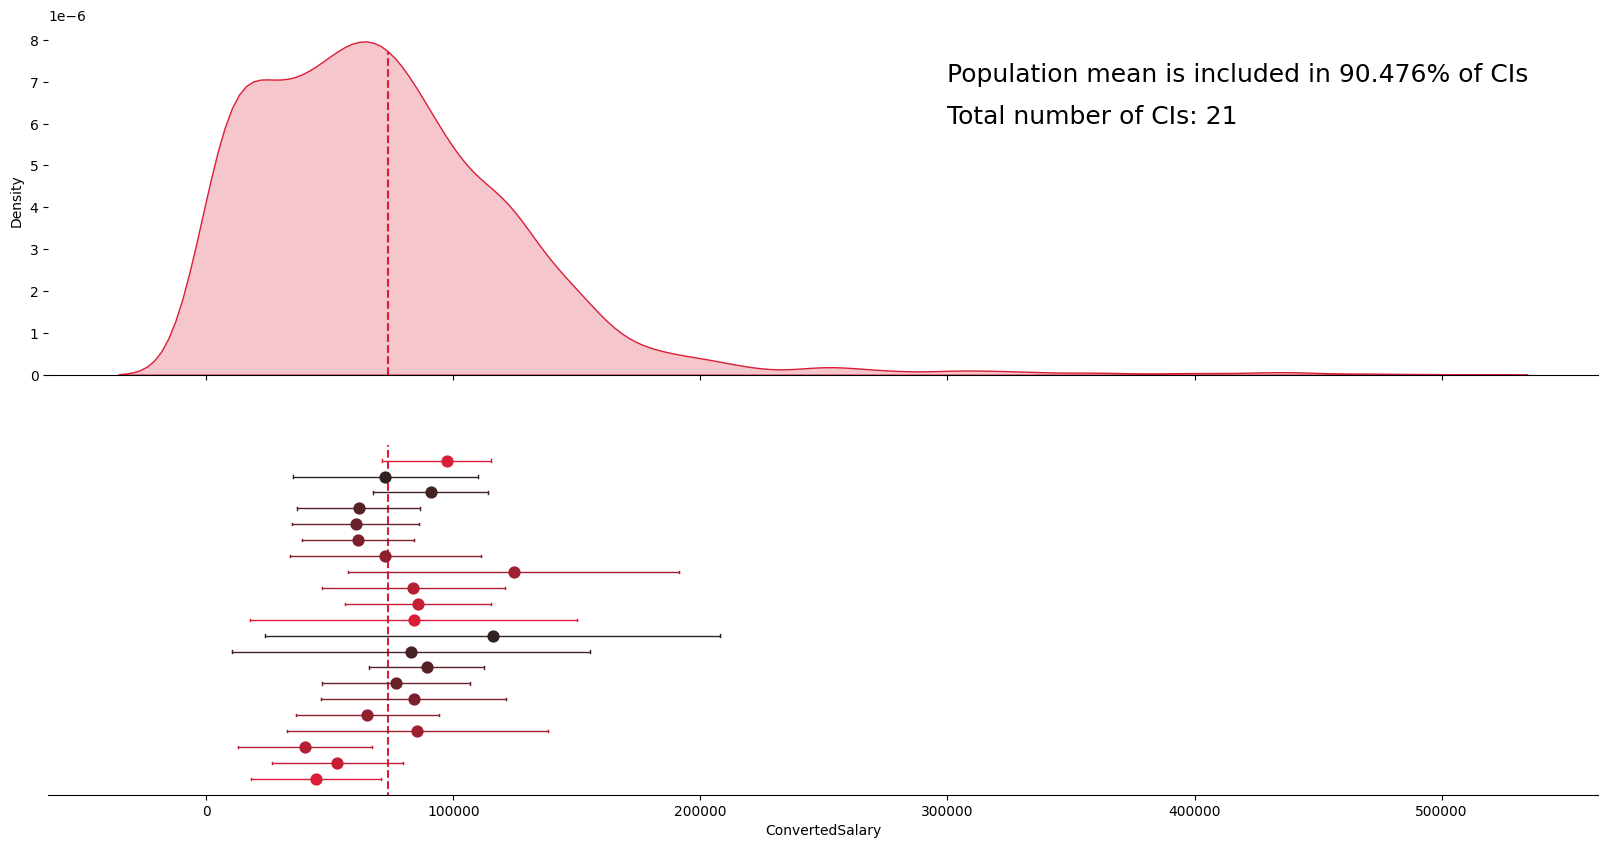

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import matplotlib.ticker as ticker
import seaborn as sns
from ipywidgets import widgets
from IPython.display import display, clear_output
import pandas as pd
from traitlets import traitlets
import scipy.stats as stats
import numpy as np
import matplotlib.ticker as ticker
import matplotlib


def confidence_interval(confidence, data):
    mean = data.mean()
    n = len(data)
    stderr_mean = stats.sem(data)
    interval = stderr_mean * stats.t.ppf((1+confidence) / 2, n-1)
    return(mean-interval, mean, mean+interval, interval)

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv')

class LoadedButton(widgets.Button):
    def __init__(self, memory, counter=0, value=0,  *args, **kwargs):
        super(LoadedButton, self).__init__(*args, **kwargs)
        self.add_traits(value=traitlets.Any(value))
        self.memory = memory
        self.counter = counter


confidence_level = widgets.FloatSlider(min=0.01, max=.99, step=0.01, value=0.95, description=u'1-\u03B1')
sample_size = widgets.IntSlider(min=10, max=100, description='n')
generate_ci = LoadedButton(description='generate', memory=pd.DataFrame(), button_style='danger')
generate_ci.style.button_color='#a71e34'
clr = widgets.Button(description='clear', button_style='danger')
generate_x10 = widgets.Button(description='generate x10', button_style='danger')
generate_x10.style.button_color='#a71e34'
clr.style.button_color='#641220'

def on_click_clear(b):
    generate_ci.counter = 0
    generate_ci.memory = pd.DataFrame()
    clear_output()
    display(widgets.HBox([generate_ci, generate_x10, clr, sample_size, confidence_level]))
    fig, axs = plt.subplots(2, 1, figsize=(20, 10), sharex=True)
    #distribution plot
    sns.kdeplot(x=df['ConvertedSalary'], fill=True, ax=axs[0], color='#da1e37')
    axs[0].spines['top'].set_visible(False)
    axs[0].spines['right'].set_visible(False)
    axs[0].vlines(df['ConvertedSalary'].mean(), 0, 7.71e-6, ls='--', color='#da1e37')
    axs[0].spines['left'].set_visible(False)
    #confidence intervals plot
    #axs[1] = sns.pointplot(x=generate_ci.memory['measurements'], y=generate_ci.memory[0], errwidth=1, capsize=0.02, join=False, hue=generate_ci.memory[0])
    axs[1].vlines(df['ConvertedSalary'].mean(), 0, 5, ls='--', color='#da1e37')
    axs[1].tick_params(left=False, labelleft=False)
    axs[1].set_xlabel('ConvertedSalary')
    axs[1].spines['top'].set_visible(False)
    axs[1].spines['left'].set_visible(False)
    axs[1].spines['right'].set_visible(False)









def on_click_generate(b, df=df):
    matplotlib.pyplot.rcdefaults()
    clear_output()
    display(widgets.HBox([generate_ci, generate_x10, clr, sample_size, confidence_level]))
    generate_ci.value = int(generate_ci.value)
    generate_ci.value+=1
    generate_ci.value = str(generate_ci.value)

    lower, mean, upper, moe = confidence_interval(confidence_level.value, df['ConvertedSalary'].sample(n=sample_size.value, replace=True))
    if df.ConvertedSalary.mean() >= lower and df.ConvertedSalary.mean() <= upper:
        generate_ci.counter+=1
    
    conf_int = [lower, mean, upper]
    conf_int = pd.DataFrame({'ConvertedSalary':conf_int})
    
    
    addition = (pd.concat([conf_int, pd.DataFrame({'order': [generate_ci.value]*len(conf_int)})], axis=1))
    generate_ci.memory = pd.concat([addition, generate_ci.memory]).reset_index(drop = True)


    


    fig, axs = plt.subplots(2, 1, figsize=(20, 10), sharex=True)
    #distribution plot
    sns.kdeplot(x=df['ConvertedSalary'], fill=True, ax=axs[0], color='#da1e37')
    axs[0].spines['top'].set_visible(False)
    axs[0].spines['right'].set_visible(False)
    axs[0].vlines(df['ConvertedSalary'].mean(), 0, 7.71e-6, ls='--', color='#da1e37')
    axs[0].spines['left'].set_visible(False)
    #confidence intervals plot
    axs[1] = sns.pointplot(x=generate_ci.memory['ConvertedSalary'], y=generate_ci.memory['order'], errwidth=1, capsize=0.15, join=False, hue=generate_ci.memory['order'])
    axs[1].vlines(df['ConvertedSalary'].mean(), -2, 1000, ls='--', color='#da1e37')
    axs[1].get_legend().remove()
    axs[1].set_ylim([-1, len(generate_ci.memory['order'])/3])
    axs[1].set_ylabel("")
    axs[1].tick_params(left=False, labelleft=False)
    axs[1].spines['top'].set_visible(False)
    axs[1].spines['left'].set_visible(False)
    axs[1].spines['right'].set_visible(False)

    #axs[1].yaxis.set_major_locator(ticker.LinearLocator(5))
    #axs[1].yaxis.set_minor_locator(ticker.NullLocator())

    axs[0].text(300000, 7e-6, 'Population mean is included in '+f'{round(generate_ci.counter/(len(generate_ci.memory)/3)*100, 3)}% of CIs', size=18)
    axs[0].text(300000, 6e-6, f'Total number of CIs: {round(len(generate_ci.memory)/3)}', size=18)
    plt.show()


def on_click_x10(b, df=df):
    clear_output()
    display(widgets.HBox([generate_ci, generate_x10, clr, sample_size, confidence_level]))

    colors = ["#641220", "#6e1423", "#85182a", "#a11d33", "#a71e34", "#b21e35", "#bd1f36", "#c71f37", "#da1e37", "#e01e37"]

    for i in range(10):
        generate_ci.value = int(generate_ci.value)
        generate_ci.value+=1
        generate_ci.value = str(generate_ci.value)

        lower, mean, upper, moe = confidence_interval(confidence_level.value, df['ConvertedSalary'].sample(n=sample_size.value, replace=True))
        if df.ConvertedSalary.mean() >= lower and df.ConvertedSalary.mean() <= upper:
            generate_ci.counter+=1
        
        conf_int = [lower, mean, upper]
        conf_int = pd.DataFrame({'ConvertedSalary':conf_int})
    
    
        addition = (pd.concat([conf_int, pd.DataFrame({'order': [generate_ci.value]*len(conf_int)})], axis=1))
        generate_ci.memory = pd.concat([addition, generate_ci.memory]).reset_index(drop = True)


    


    fig, axs = plt.subplots(2, 1, figsize=(20, 10), sharex=True)
    #distribution plot
    sns.kdeplot(x=df['ConvertedSalary'], fill=True, ax=axs[0], color='#da1e37')
    axs[0].spines['top'].set_visible(False)
    axs[0].spines['right'].set_visible(False)
    axs[0].vlines(df['ConvertedSalary'].mean(), 0, 7.71e-6, ls='--', color='#da1e37')
    axs[0].spines['left'].set_visible(False)
    #confidence intervals plot
    axs[1] = sns.pointplot(x=generate_ci.memory['ConvertedSalary'], 
                           y=generate_ci.memory['order'], 
                           errwidth=1, capsize=0.15, join=False, 
                           hue=generate_ci.memory['order'], 
                           palette=sns.dark_palette("#da1e37", 10, reverse=True))
    
    
    axs[1].vlines(df['ConvertedSalary'].mean(), -2, 1000, ls='--', color='#da1e37')
    axs[1].get_legend().remove()
    axs[1].set_ylim([-1, len(generate_ci.memory['order'])/3])
    axs[1].set_ylabel("")
    axs[1].tick_params(left=False, labelleft=False)
    axs[1].spines['top'].set_visible(False)
    axs[1].spines['left'].set_visible(False)
    axs[1].spines['right'].set_visible(False)


    axs[0].text(300000, 7e-6, 'Population mean is included in '+f'{round(generate_ci.counter/(len(generate_ci.memory)/3)*100, 3)}% of CIs', size=18)
    axs[0].text(300000, 6e-6, f'Total number of CIs: {round(len(generate_ci.memory)/3)}', size=18)
    plt.show()
 
    
    
    
    
    #for i in range(10):
     #   on_click_generate(b, df)


generate_ci.on_click(on_click_generate)
clr.on_click(on_click_clear)
generate_x10.on_click(on_click_x10)

display(widgets.HBox([generate_ci, generate_x10, clr, sample_size, confidence_level]))

fig, axs = plt.subplots(2, 1, figsize=(20, 10), sharex=True)
#distribution plot
sns.kdeplot(x=df['ConvertedSalary'], fill=True, ax=axs[0], color='#da1e37')
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].vlines(df['ConvertedSalary'].mean(), 0, 7.71e-6, ls='--', color='#da1e37')
axs[0].spines['left'].set_visible(False)
#confidence intervals plot
#axs[1] = sns.pointplot(x=generate_ci.memory['measurements'], y=generate_ci.memory[0], errwidth=1, capsize=0.02, join=False, hue=generate_ci.memory[0])
axs[1].vlines(df['ConvertedSalary'].mean(), 0, 5, ls='--', color='#da1e37')
axs[1].tick_params(left=False, labelleft=False)
axs[1].set_xlabel('ConvertedSalary')
axs[1].spines['top'].set_visible(False)
axs[1].spines['left'].set_visible(False)
axs[1].spines['right'].set_visible(False)


plt.show()


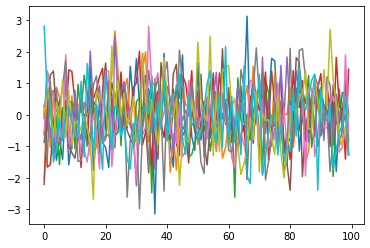

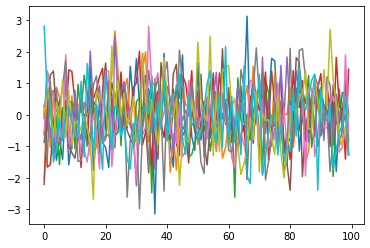

In [ ]:
"%matplotlib inline
import time
import pylab as pl
from IPython import display
for i in range(10):
    pl.plot(pl.randn(100))
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(1.0)

<IPython.core.display.Javascript object>

100

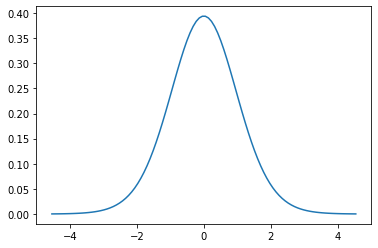

In [ ]:
from scipy.stats import t

# Freeze for df=20, loc=0, scale=1 and get the first four moments from stats()
rv = t(df=540, loc=0, scale=1)
mean, var, skew, kurt = rv.stats(moments='mvsk')
mean, var, skew, kurt

import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt
%matplotlib inline

rv = t(df=20, loc=0, scale=1)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100)
y = rv.pdf(x) 

plt.xlim(-5,5)
plt.plot(x,y)

stats.ttest_1samp(y, 0)
len(y)

# <font color='#036666'>**$\chi^2$ testing**</font>

In [ ]:
#@title
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from ipywidgets import widgets
from IPython.display import display
import scipy.integrate as integrate
from sympy import Symbol, Derivative

# Instantiating UI
dfr = widgets.IntSlider(min=1, max=30, value=4, description='dof:',
                        couninous_update=False)
chi_crit = widgets.FloatSlider(min=0, max=60, value=5, description='Χ-squared',
                               countinuous_update=False )
a_level = widgets.FloatSlider(min=0.01, max=0.99, value=0.05, step=0.01,
                              description=u'\u03B1:', countinuous_update=False)

def chi_square(dof, chi, alpha):
#x-axis ranges from 0 to 60 with .001 steps
    x = np.arange(0, 60, 0.001)

    #plot Chi-square distribution with <drf.value> degrees of freedom
    fig_chisq = plt.figure(figsize=(20, 10), dpi=300)
    ax_chi = plt.subplot(111)
    ax_chi.plot(x, chi2.pdf(x, dof), color='#036666')
    ax_chi.fill_between(x, chi2.pdf(x, dof), color='#99e2b4')
    ax_chi.spines['top'].set_visible(False)
    ax_chi.spines['right'].set_visible(False)
    ax_chi.set_title(r'$\chi^2$ distribution')

    #finding p-value by integrating the area under chi2.pdf():
    integral = lambda x: chi2.pdf(x, dof)
    probability = integrate.quad(integral, chi, 60)[0]
    chi_text = r'$\chi^2$'+f'({dof}) = {chi}'
    chi_text_p = f'p-value: {round(probability, 3)}'
    
    #finding the corresponding chi-squared for certain alpha level by iteration
    row = [0, 10, 20, 30, 40, 50, 60]
    for i, number in enumerate(row):
        if integrate.quad(integral, number, 60)[0] > alpha:
            pass
        elif integrate.quad(integral, number, 60)[0] < alpha:
            for k in np.arange(row[i-1], row[i], 0.1):
                if integrate.quad(integral, k, 60)[0] <= alpha:
                    alpha_line = k
                    break
            break
    #plotting alpha
    ax_chi.vlines(alpha_line, 0, chi2.pdf(alpha_line, dof), color='red')
    ax_chi.fill_between(x, chi2.pdf(x, dof), where=x>alpha_line, color='red', alpha=0.3)
    
    #plotting p-value and obtained chi-square:
    ax_chi.fill_between(x, chi2.pdf(x, dof), where=x>chi, color='#248277')
    ax_chi.vlines(chi, 0, chi2.pdf(chi, dof), color='#56ab91')
    
    #making a decision based on p-value and alpha:
    rejection = (r'$\mathit{H}_0$ is not rejected', r'$\mathit{H}_0$ is rejected')[alpha >= probability]

    #text-on-plot output
    if dof <=4:
        ax_chi.set(ylim=(0, 0.6), xlim=(0, 20))
        ax_chi.text(5, 0.3, chi_text, size=15)
        ax_chi.text(5, 0.28, chi_text_p, size=15)
        ax_chi.text(5, 0.26, r'$\alpha$: {}'.format(alpha), size=15)
        ax_chi.text(5, 0.24, rejection, size=15)
    elif dof <=10:
        ax_chi.set(ylim=(0, 0.20), xlim=(0, 40))
        ax_chi.text(15, 0.125, chi_text, size=15)
        ax_chi.text(15, 0.115, chi_text_p, size=15)
        ax_chi.text(15, 0.105, r'$\alpha$: {}'.format(alpha), size=15)
    else:
        ax_chi.set(ylim=(0, 0.10), xlim=(0, 60))
        ax_chi.text(30, 0.08, chi_text, size=15)
        ax_chi.text(30, 0.075, chi_text_p, size=15)
        ax_chi.text(30, 0.70, r'$\alpha$: {}'.format(alpha), size=15)

    
    # labeling axis
    ax_chi.set_xlabel(r'$\chi^2$')
    ax_chi.set_ylabel('probability density')
    plt.show()

    

ui_chi = widgets.HBox([dfr, chi_crit, a_level])
out_chi = widgets.interactive_output(chi_square, {'dof':dfr, 'chi':chi_crit, 'alpha':a_level})
#final display
display(ui_chi, out_chi)



Output()

In [ ]:
#@title

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets

def f(x, a, b):
    
    y = a*x+b
    plt.plot([0,0], [x,y])
    plt.xlim([-5, 5])
    plt.ylim([-5, 5])
    return(plt.show())


interact(f, x=(-5, 5, 0.1), a=4, b=4);



<IPython.core.display.Javascript object>

interactive(children=(FloatSlider(value=0.0, description='x', max=5.0, min=-5.0), IntSlider(value=4, descripti…

In [ ]:
from IPython.display import display
button = widgets.Button(description="Click Me!")
output = widgets.Output()

display(button, output)

def on_button_clicked(b):
    with output:
        print("Button clicked.")

button.on_click(on_button_clicked)

<IPython.core.display.Javascript object>

Button(description='Click Me!', style=ButtonStyle())

Output()

In [ ]:
r = 24

def function(r, alpha):
    
    return(r)

interact(function, r=13, alpha=34)

<IPython.core.display.Javascript object>

interactive(children=(IntSlider(value=13, description='r', max=39, min=-13), IntSlider(value=34, description='…

<function __main__.function>

In [ ]:
caption = widgets.Label(value='The values of slider1 and slider2 are synchronized')
sliders1, slider2 = widgets.IntSlider(description='Slider 1'),\
                    widgets.IntSlider(description='Slider 2')
l = widgets.link((sliders1, 'min'), (slider2, 'value'))
display(caption, sliders1, slider2)

<IPython.core.display.Javascript object>

Label(value='The values of slider1 and slider2 are synchronized')

IntSlider(value=0, description='Slider 1')

IntSlider(value=0, description='Slider 2')

In [ ]:

int_range = widgets.IntSlider()
dr_range = widgets.IntSlider()

output2 = widgets.Output()
display(int_range, dr_range, output2)

def on_value_change(change):
    dr_range.value=int_range.value+4

def on_value_change1(change):
    int_range.value=dr_range.value+8



int_range.observe(on_value_change)
dr_range.observe(on_value_change1)


<IPython.core.display.Javascript object>

IntSlider(value=0)

IntSlider(value=0)

Output()

In [ ]:
caption = widgets.Label(value='The values of range1 and range2 are synchronized')
slider = widgets.IntSlider(min=-5, max=5, value=1, description='Slider')

def handle_slider_change(change):
    caption.value = 'The slider value is ' + (
        'negative' if change.new < 0 else 'nonnegative'
    )

slider.observe(handle_slider_change, names='value')

display(caption, slider)

<IPython.core.display.Javascript object>

Label(value='The values of range1 and range2 are synchronized')

IntSlider(value=1, description='Slider', max=5, min=-5)

In [ ]:
import math
slider1 = widgets.FloatSlider()
slider4 = widgets.FloatSlider()
display(slider1, slider4)

def slider1_handler(*args):
    slider1.value = slider4.value**2

def slider4_handler(*args):
    slider4.value = math.sqrt(slider1.value)

slider1.observe(slider4_handler)
slider4.observe(slider1_handler)

<IPython.core.display.Javascript object>

FloatSlider(value=0.0)

FloatSlider(value=0.0)

In [ ]:


from ipywidgets import *

b1 = Button(description=u'\u03C3') # works
display(b1)

<IPython.core.display.Javascript object>

Button(description='σ', style=ButtonStyle())

<IPython.core.display.Javascript object>

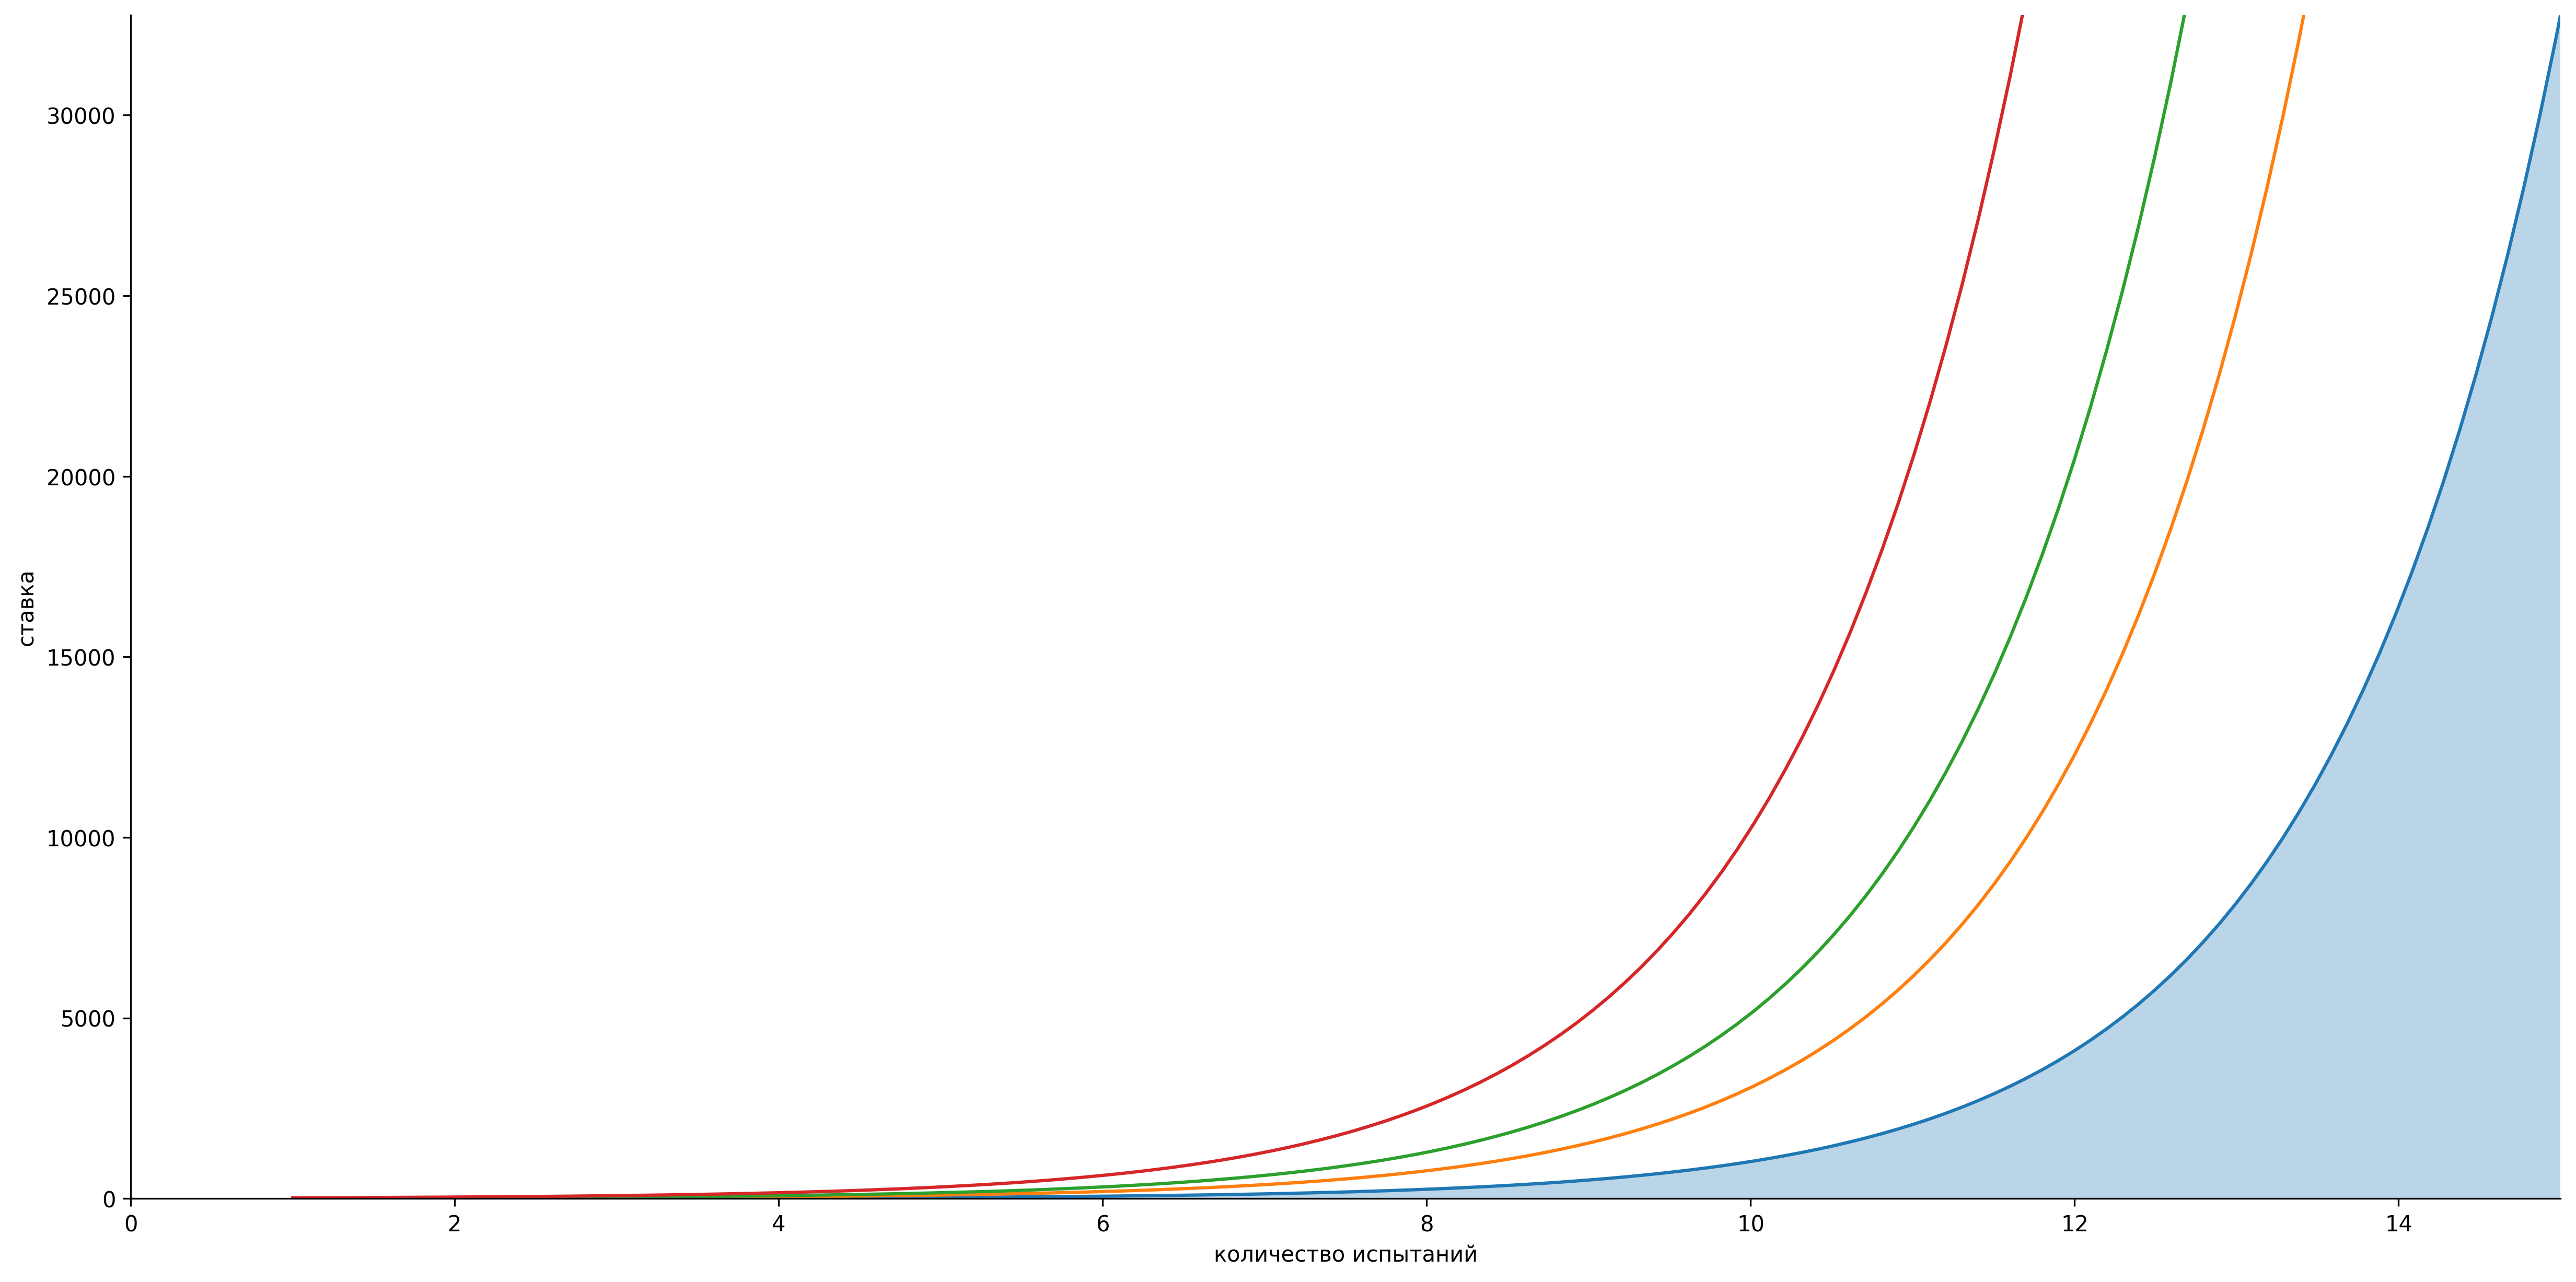

In [ ]:
xx = np.linspace(1, 100, 1000)
yy = []
for i in xx:
    yy.append(2**i)

multiplier = np.array([3, 5, 10])
xlim = 15
ylim = 2**xlim
yy = np.array(yy)

def martingale(x):
    return(2**x)

fig3 = plt.figure(figsize=(20, 10), dpi=300)
ax4 = plt.subplot(111)
ax4.plot(xx, yy)
for k in multiplier:
    ax4.plot(xx, yy*k)

ax4.set_xlabel('количество испытаний')
ax4.set_ylabel('ставка')
ax4.set_ylim([0, ylim])
ax4.set_xlim([0, xlim])
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.fill_between(xx, yy, alpha = 0.3)

plt.show()

